# PetFinder.my - Pawpularity Contest
Predict the popularity of shelter pet photos

[![PetFinder](https://storage.googleapis.com/kaggle-media/competitions/Petfinder/PetFinder%20-%20Logo.png)](https://www.petfinder.my/)

![](https://www.petfinder.my/images/cuteness_meter.jpg)

A picture is worth a thousand words. But did you know a picture can save a thousand lives? Millions of stray animals suffer on the streets or are euthanized in shelters every day around the world. You might expect pets with attractive photos to generate more interest and be adopted faster. But what makes a good picture? With the help of data science, you may be able to accurately determine a pet photo’s appeal and even suggest improvements to give these rescue animals a higher chance of loving homes.

[PetFinder.my](https://PetFinder.my/) is Malaysia’s leading animal welfare platform, featuring over 180,000 animals with 54,000 happily adopted. PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare.

Currently, PetFinder.my uses a basic [Cuteness Meter](https://PetFinder.my/cutenessmeter) to rank pet photos. It analyzes picture composition and other factors compared to the performance of thousands of pet profiles. While this basic tool is helpful, it's still in an experimental stage and the algorithm could be improved.

In this competition, you’ll analyze raw images and metadata to predict the “Pawpularity” of pet photos. You'll train and test your model on PetFinder.my's thousands of pet profiles. Winning versions will offer accurate recommendations that will improve animal welfare.

If successful, your solution will be adapted into AI tools that will guide shelters and rescuers around the world to improve the appeal of their pet profiles, automatically enhancing photo quality and recommending composition improvements. As a result, stray dogs and cats can find their "furever" homes much faster. With a little assistance from the Kaggle community, many precious lives could be saved and more happy families created.

Top participants may be invited to collaborate on implementing their solutions and creatively improve global animal welfare with their AI skills.

![](https://www.petfinder.my/images/cuteness_meter-showcase.jpg)

  

> **This is a Code Competition. Refer to [Code Requirements](https://www.kaggle.com/c/petfinder-pawpularity-score/overview/code-requirements) for details.**

## Data Description

In this competition, your task is to predict engagement with a pet's profile based on the photograph for that profile. You are also provided with hand-labelled metadata for each photo. The dataset for this competition therefore comprises both images and tabular data.

How Pawpularity Score Is Derived
--------------------------------

*   The **Pawpularity Score** is derived from each pet profile's page view statistics at the listing pages, using an algorithm that normalizes the traffic data across different pages, platforms (web & mobile) and various metrics.
*   Duplicate clicks, crawler bot accesses and sponsored profiles are excluded from the analysis.

Purpose of Photo Metadata
-------------------------

*   We have included optional **Photo Metadata**, manually labeling each photo for key visual quality and composition parameters.
*   These labels are **not used** for deriving our Pawpularity score, but it may be beneficial for better understanding the content and co-relating them to a photo's attractiveness. Our end goal is to deploy AI solutions that can generate intelligent recommendations (i.e. show a closer frontal pet face, add accessories, increase subject focus, etc) and automatic enhancements (i.e. brightness, contrast) on the photos, so we are hoping to have predictions that are more easily interpretable.
*   You may use these labels as you see fit, and optionally build an intermediate / supplementary model to predict the labels from the photos. If your supplementary model is good, we may integrate it into our AI tools as well.
*   In our production system, new photos that are dynamically scored will not contain any photo labels. If the Pawpularity prediction model requires photo label scores, we will use an intermediary model to derive such parameters, before feeding them to the final model.

Training Data
-------------

*   **train/** - Folder containing training set photos of the form **{id}.jpg**, where **{id}** is a unique Pet Profile ID.
*   **train.csv** - Metadata (described below) for each photo in the training set as well as the target, the photo's **Pawpularity** score. The **Id** column gives the photo's unique Pet Profile ID corresponding the photo's file name.

Example Test Data
-----------------

In addition to the training data, we include some randomly generated example test data to help you author submission code. When your submitted notebook is scored, this example data will be replaced by the actual test data (including the sample submission).

*   **test/** - Folder containing randomly generated images in a format similar to the training set photos. The actual test data comprises about 6800 pet photos similar to the training set photos.
*   **test.csv** - Randomly generated metadata similar to the training set metadata.
*   **sample\_submission.csv** - A sample submission file in the correct format.

Photo Metadata
--------------

The **train.csv** and **test.csv** files contain metadata for photos in the training set and test set, respectively. Each pet photo is labeled with the value of **1** (Yes) or **0** (No) for each of the following features:

*   **Focus** - Pet stands out against uncluttered background, not too close / far.
*   **Eyes** - Both eyes are facing front or near-front, with at least 1 eye / pupil decently clear.
*   **Face** - Decently clear face, facing front or near-front.
*   **Near** - Single pet taking up significant portion of photo (roughly over 50% of photo width or height).
*   **Action** - Pet in the middle of an action (e.g., jumping).
*   **Accessory** - Accompanying physical or digital accessory / prop (i.e. toy, digital sticker), excluding collar and leash.
*   **Group** - More than 1 pet in the photo.
*   **Collage** - Digitally-retouched photo (i.e. with digital photo frame, combination of multiple photos).
*   **Human** - Human in the photo.
*   **Occlusion** - Specific undesirable objects blocking part of the pet (i.e. human, cage or fence). Note that not all blocking objects are considered occlusion.
*   **Info** - Custom-added text or labels (i.e. pet name, description).
*   **Blur** - Noticeably out of focus or noisy, especially for the pet’s eyes and face. For Blur entries, “Eyes” column is always set to 0.

Link: https://www.kaggle.com/competitions/petfinder-pawpularity-score/overview

Help: https://www.kaggle.com/code/warotjanpinitrat/lovely-doggo-with-bonky-fastai-timm

In [1]:
import timm
from fastai.vision.all import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
train_df = pd.read_csv("../../data/petfinder-pawpularity-score/train.csv")
train_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


<IPython.core.display.Javascript object>

In [4]:
test_df = pd.read_csv("../../data/petfinder-pawpularity-score/test.csv")
test_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1


<IPython.core.display.Javascript object>

In [5]:
sample_submission_df = pd.read_csv(
    "../../data/petfinder-pawpularity-score/sample_submission.csv"
).set_index("Id")
sample_submission_df

,Pawpularity
Id,
4128bae22183829d2b5fea10effdb0c3,67.75
43a2262d7738e3d420d453815151079e,59.15
4e429cead1848a298432a0acad014c9d,20.02
80bc3ccafcc51b66303c2c263aa38486,94.53
8f49844c382931444e68dffbe20228f4,89.82
b03f7041962238a7c9d6537e22f9b017,65.50
c978013571258ed6d4637f6e8cc9d6a3,71.42
e0de453c1bffc20c22b072b34b54e50f,5.85


<IPython.core.display.Javascript object>

# Dataloader / Visualisation

In [6]:
IMAGE_DIR = "../../data/petfinder-pawpularity-score/train"

train_df["Pawpularity"] = train_df["Pawpularity"] / 100
train_df["ImagePath"] = train_df["Id"].map(
    lambda image_id: os.path.join(IMAGE_DIR, image_id + ".jpg")
)
train_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,ImagePath
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,0.63,../../data/petfinder-pawpularity-score/train/0007de18844b0dbbb5e1f607da0606e0.jpg
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,0.42,../../data/petfinder-pawpularity-score/train/0009c66b9439883ba2750fb825e1d7db.jpg
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,0.28,../../data/petfinder-pawpularity-score/train/0013fd999caf9a3efe1352ca1b0d937e.jpg
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,0.15,../../data/petfinder-pawpularity-score/train/0018df346ac9c1d8413cfcc888ca8246.jpg
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,0.72,../../data/petfinder-pawpularity-score/train/001dc955e10590d3ca4673f034feeef2.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,0.15,../../data/petfinder-pawpularity-score/train/ffbfa0383c34dc513c95560d6e1fdb57.jpg
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,0.70,../../data/petfinder-pawpularity-score/train/ffcc8532d76436fc79e50eb2e5238e45.jpg
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,0.20,../../data/petfinder-pawpularity-score/train/ffdf2e8673a1da6fb80342fa3b119a20.jpg
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,0.20,../../data/petfinder-pawpularity-score/train/fff19e2ce11718548fa1c5d039a5192a.jpg


<IPython.core.display.Javascript object>

In [7]:
X_train, X_true = train_test_split(train_df, test_size=0.1)
X_train.shape, X_true.shape

((8920, 15), (992, 15))

<IPython.core.display.Javascript object>

In [8]:
dls = ImageDataLoaders.from_df(
    X_train[["ImagePath", "Pawpularity"]],
    valid_pct=0.2,
    y_block=RegressionBlock,
    bs=16,
    item_tfms=Resize(224),
    batch_tfms=setup_aug_tfms([Brightness(), Contrast(), Hue(), Saturation()]),
)

<IPython.core.display.Javascript object>

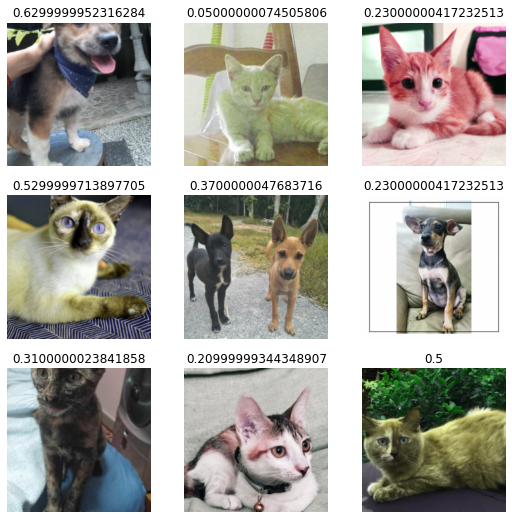

<IPython.core.display.Javascript object>

In [9]:
dls.train.show_batch()

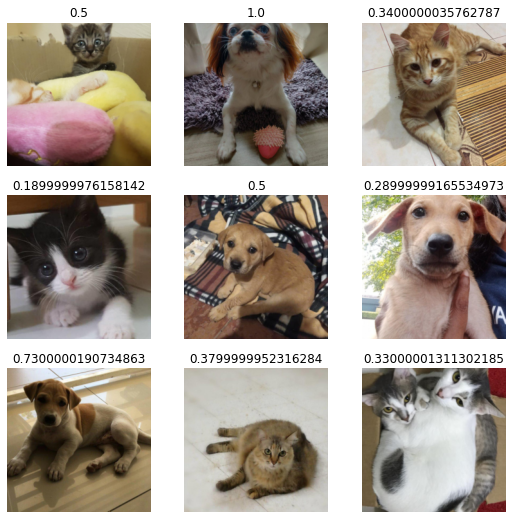

<IPython.core.display.Javascript object>

In [10]:
dls.valid.show_batch()

# Model

In [11]:
model = timm.create_model(
    "swin_large_patch4_window7_224", pretrained=True, num_classes=dls.c
)

/home/alxgrin/miniconda3/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<IPython.core.display.Javascript object>

# Train

In [12]:
def petfinder_rmse(preds, target):
    return 100 * torch.sqrt(F.mse_loss(F.sigmoid(preds.flatten()), target))


learn = Learner(
    dls, model, loss_func=BCEWithLogitsLossFlat(), metrics=petfinder_rmse
).to_fp16()
learn

<IPython.core.display.Javascript object>

SuggestedLRs(valley=4.828246164834127e-05)

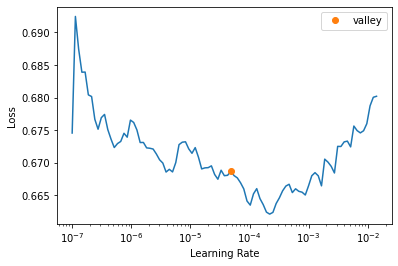

<IPython.core.display.Javascript object>

In [13]:
learn.lr_find(end_lr=3e-2)

epoch,train_loss,valid_loss,petfinder_rmse,time
0,0.659790,0.655774,18.663101,03:02
1,0.647671,0.642772,17.009588,03:01
2,0.640447,0.640318,16.665064,03:00
3,0.644954,0.637616,16.296476,03:00
4,0.637285,0.640200,16.693926,03:00
5,0.628304,0.641098,16.795221,03:00


/home/alxgrin/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Better model found at epoch 0 with valid_loss value: 0.6557735800743103.
Better model found at epoch 1 with valid_loss value: 0.6427717208862305.
Better model found at epoch 2 with valid_loss value: 0.6403177976608276.
Better model found at epoch 3 with valid_loss value: 0.637615978717804.
No improvement since epoch 3: early stopping


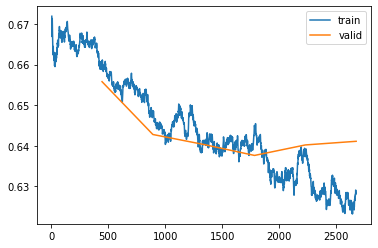

<IPython.core.display.Javascript object>

In [14]:
learn.fit_one_cycle(
    20,
    2e-5,
    cbs=[
        SaveModelCallback(),
        EarlyStoppingCallback(monitor="petfinder_rmse", comp=np.less, patience=2),
    ],
)

learn.recorder.plot_loss()

# Test

In [15]:
test_dl = dls.test_dl(
    X_true[["ImagePath", "Pawpularity"]],
)

preds, _ = learn.tta(dl=test_dl, n=5, beta=0)

<IPython.core.display.Javascript object>

In [33]:
mean_squared_error(X_true[["Pawpularity"]], preds, squared=False)

0.18203157961454314

<IPython.core.display.Javascript object>